```
Aryan Chauhan
PRN - 1032222639
Batch - G1
```

# **Parkinson Disease Prediction using decision tree Classifier and RFC**

In this, I used a decision tree classifier to predict the parkinson disease in various patients as well as RFC.

# Contents
1. [Importing dependencies]()
2. [Statistical Analysis]()
3. [Checking null values]()
4. [Unique value counts]()
5. [Train_Test_Split]()
6. [Scalar transformation]()
7. [Implementing Decision Tree Classifier]()
8. [Confusion Matrix and other metrics]()
9. [Saving the model]()
10. [Conclusion]()
11. [Post Lab Questions]()

# Results
Surprisingly I got extraordinary results with Decision Tree Classifier
- Accuracy with training data: `100%`
- Accuracy with test data: `92.30%`


# 1. Importing dependencies

## 1.1 Libraries Used for Parkinson's Disease Detection

To implement a Parkinson's disease detection model, the following Python libraries are utilized:

- **pandas**: Used for data manipulation and analysis.
- **numpy**: Provides support for numerical computations.
- **matplotlib.pyplot**: Used for visualizing the data and model performance.
- **sklearn.model_selection (train_test_split)**: Splits the dataset into training and testing sets.
- **sklearn.preprocessing (StandardScaler)**: Standardizes features by removing the mean and scaling to unit variance.
- **sklearn.tree (DecisionTreeClassifier)**: Implements the Decision Tree algorithm for classification.
- **sklearn.metrics (accuracy_score)**: Evaluates the accuracy of the model.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## 1.2 Importing dataset

In [42]:
data = pd.read_csv('/content/parkinsons.data')

## 1.3 Understanding the dataset

In [43]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 1.4 Dataframe of the dataset

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# 2. Statistical Analysis


In [45]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# 3. Checking null values

In [46]:
data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


# 4. Unique value counts

In [47]:
data['status'].value_counts()

,count
status,
1,147
0,48


In [48]:
x = data.drop(columns=['status', 'name'], axis=1)
y = data['status']

# 5. `train_test_split` method for the decision tree classifier

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [50]:
print(x.shape, x_train.shape, x_test.shape)

(195, 22) (156, 22) (39, 22)


In [51]:
print(y.shape, y_train.shape, y_test.shape)

(195,) (156,) (39,)


# 6. Standard Scale Input Values

1. **Fitting the Scaler to Train Data**:
   - **Purpose**: When training a machine learning model, it is crucial that the data input features are on a comparable scale. This is because many algorithms, like those using gradient descent (e.g., logistic regression, neural networks) or distance-based methods (e.g., k-NN, SVM), are sensitive to the scale of the input data.
   - **Process**: The scaler is first fitted to the training data, meaning that it computes the mean and standard deviation for each feature based on the training data. This process ensures that these statistics are calculated using only the training set, avoiding any data leakage from the test set.

2. **Transforming Both Train and Test Data**:
   - **Purpose**: Once the scaler is fitted to the training data, the same transformation (using the computed mean and standard deviation) is applied to both the training and test datasets. This standardizes the data such that each feature has a mean of 0 and a standard deviation of 1 in the training data.
   - **Consistency**: By transforming both the training and test sets with the same scaler, we ensure that the model interprets the test data in the same way it learned from the training data. This consistency is essential for the model to perform well on unseen data.

In [52]:
scalar = StandardScaler()
scalar.fit(x_train)

StandardScaler()

In [53]:
x_train = scalar.transform(x_train)

In [54]:
x_test = scalar.transform(x_test)

In [55]:
print(x_train)

[[-0.80172872 -0.70830513 -0.10603303 ...  0.89854281 -0.48294197
   1.64980971]
 [-1.04374224 -0.74950432 -0.29919921 ...  1.17531845  0.65177741
   0.26864313]
 [-0.3790498   0.13122544 -0.82039362 ... -0.7771489  -0.73102398
   0.28542547]
 ...
 [-0.13744368 -0.31583967  0.56292775 ... -1.65126173 -0.08248373
  -0.17764131]
 [-0.14053505 -0.42034011  0.39263744 ...  0.19569946  1.19665768
  -0.11105606]
 [-0.35427092  4.57536567 -1.22354854 ...  0.55494177  0.80279984
   2.57800238]]


# 7. Implementing Decision Tree Classifier

## 7.1 Definition of model

In [75]:
model = DecisionTreeClassifier()

In [76]:
print(model)

DecisionTreeClassifier()


## 7.2 Fitting the model

In [77]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

## 7.3 Prediction

In [78]:
x_train_predict = model.predict(x_train)
train_accuracy = accuracy_score(y_train, x_train_predict)

x_test_predict = model.predict(x_test)
test_accuracy = accuracy_score(y_test, x_test_predict)

In [79]:
print('Accuracy score on train data : ', train_accuracy)
print('Accuracy score on test data : ', test_accuracy)

Accuracy score on train data :  1.0
Accuracy score on test data :  0.9230769230769231


# 8. Confusion Matrix

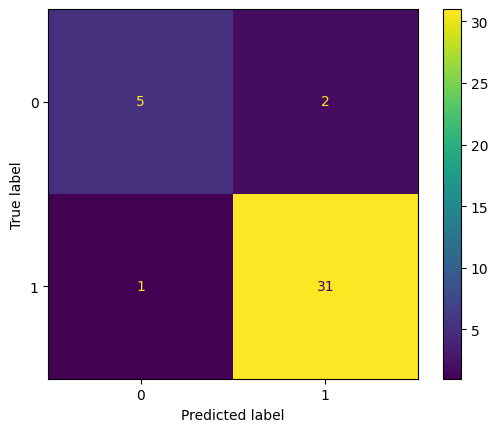

In [80]:
cm = confusion_matrix(y_test, x_test_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [81]:
input_data = (129.336,139.867,118.604,0.0049,0.00004,0.00165,0.00183,0.00495,0.02498,0.228,0.01396,0.01219,0.01947,0.04188,0.00484,25.429,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491)

input_numpy = np.asarray(input_data)

input_reshaped = input_numpy.reshape(1, -1)

std_data = scalar.transform(input_reshaped)

prediction = model.predict(std_data)
print(prediction)

if prediction == 1:
    print("The patient has parkinson disease :", prediction)
elif prediction == 0:
    print("The patient does not have parkinson disease :", prediction)
else:
    print(f"Unknown prediction value : {prediction}")

[0]
The patient does not have parkinson disease : [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 9. Saving the model

In [82]:
import pickle

with open('parkinson_DCT.pkl', 'wb') as file:
  pickle.dump(model, file)

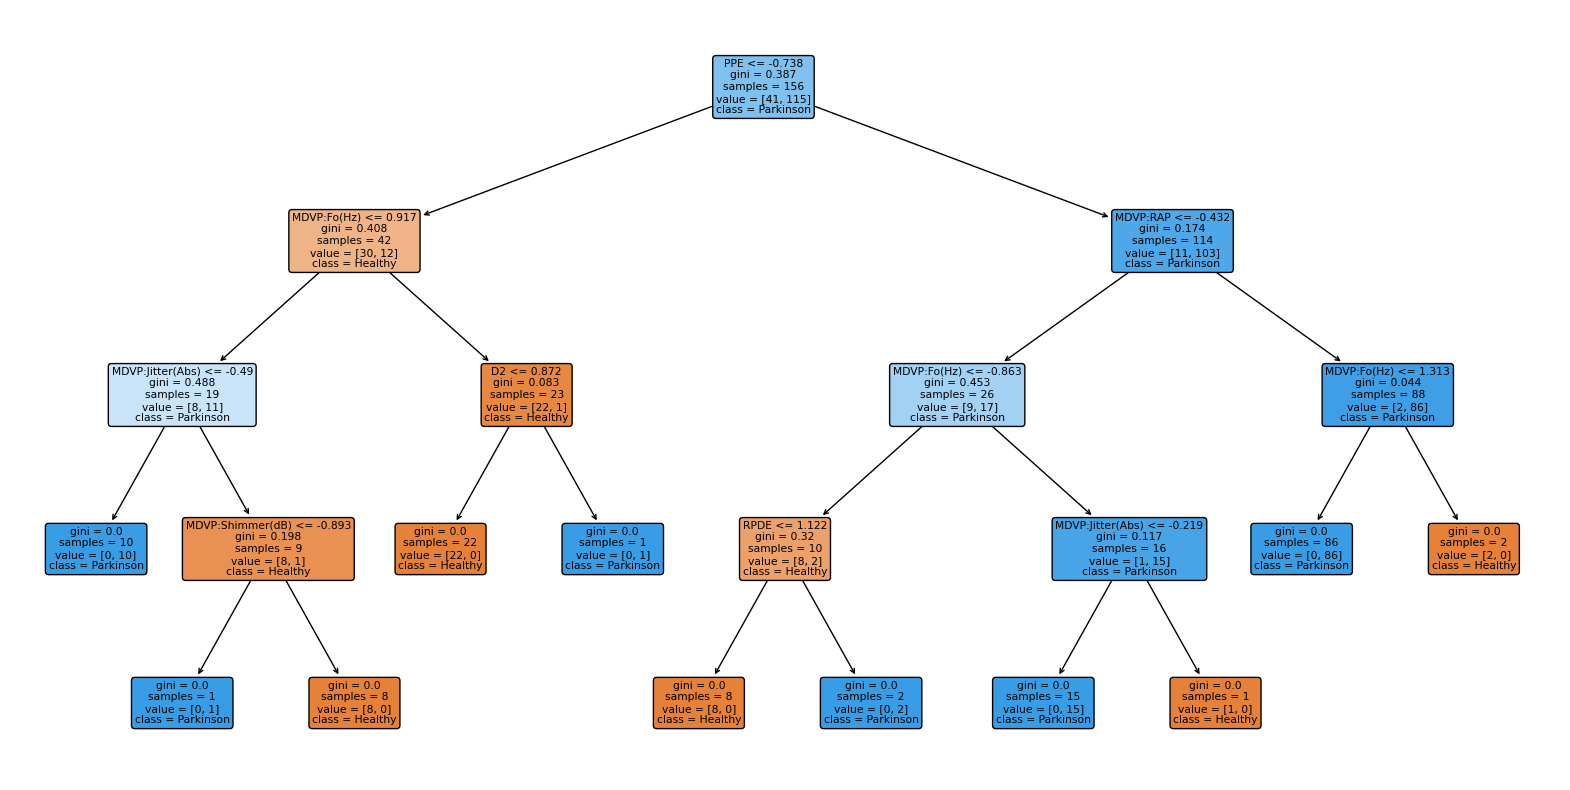

In [83]:
feature_names = [
    'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
    'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
    'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
    'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
    'spread2', 'D2', 'PPE'
]

class_names = ['Healthy', 'Parkinson']

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names = feature_names, class_names = class_names, rounded = True)
plt.show()

---

```End of Notebook```

# 10.Cross Validation Score
The score I achieved is ```77%```

In [85]:
scores = cross_val_score(model, x, y, cv=5)
mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f"Cross-Validation Accuracy: {mean_accuracy:.2f} ± {std_deviation:.2f}")


Cross-Validation Accuracy: 0.77 ± 0.11


In [88]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
predictions = model.predict(x_test)

In [90]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print('Accuracy : ', accuracy)
print('Confusion Matrix : ')
print(conf_matrix)

Accuracy :  0.9487179487179487
Confusion Matrix : 
[[ 5  2]
 [ 0 32]]


In [91]:
scores = cross_val_score(model, x, y, cv=5)
mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f"Cross-Validation Accuracy: {mean_accuracy:.2f} ± {std_deviation:.2f}")

Cross-Validation Accuracy: 0.78 ± 0.03
